In [1]:

import pickle
import matplotlib.pyplot as plt
import numpy as np
%run functions_continuous.ipynb

# Download data

In [2]:
initial_year=2024
initial_month=1
initial_day=1

initial = (initial_year,initial_month,initial_day)

end_year = 2025
end_month = 8
end_day = 1

end = (end_year, end_month, end_day)

In [4]:
import pickle
from IPython.display import clear_output

%run functions_continuous.ipynb

#symbols = ["BTCUSDT", "ADAUSDT", "ATOMUSDT", "AVAXUSDT", "BNBUSDT", "DOGEUSDT", "DOTUSDT", "ETHUSDT"]
symbols = ["BTCUSDT", "ADAUSDT", "ATOMUSDT", "AVAXUSDT", "BNBUSDT", "DOGEUSDT", "DOTUSDT", "ETHUSDT", "LINKUSDT", "LTCUSDT", "MATICUSDT", "NEARUSDT", "SHIBUSDT", "SOLUSDT", "TONUSDT", "UNIUSDT", "XRPUSDT"]
timeframes = ["1h", "4h"]
matrix_orders = [2, 3, 4]
output = {}

for SYMBOL in symbols:
    print()
    print()
    print(f"======================== Procesando: {SYMBOL} ==========================")
    print()
    print()
    for TEMPORALIDAD in timeframes:
        for ORDER in matrix_orders:
            
            """download_data_from_binance(SYMBOL, 
                                    TEMPORALIDAD,
                                    initial,
                                    end)"""
            
            df = parse_binance_files(f"data/spot/daily/klines/{SYMBOL}/{TEMPORALIDAD}") #, temporalidad)
            
            transition_matrix, transition_counts, df = order_n_matrix(df, 
                                                            order=ORDER)
            transition_matrix["direction"] = np.where(
                transition_matrix["up"] > 
                transition_matrix["dw"],
                "up",
                "dw"
            )
            
            patterns = []
            for idx, row in transition_matrix.iterrows():
                pattern = (idx[0], idx[1], row["direction"], None)
                patterns.append(pattern)
                
            patrones_validos = []
            for i in np.arange(len(patterns)):
                pattern_with_expansion = patterns[i]
                df_equity = run_simulation(df,
                                        pattern_with_expansion)
                
                sobrevivientes = plot_conditional_equity(df_equity, pattern_with_expansion)
                if sobrevivientes:
                    patrones_validos.extend(sobrevivientes)
            
            output[(SYMBOL, TEMPORALIDAD, ORDER)] = patrones_validos
            # guardar
            #with open(f"{SYMBOL}_temporalidad_order.pkl", "wb") as f:
            #    pickle.dump(output, f)
    clear_output()


# guardar
with open("symbol_temporalidad_order.pkl", "wb") as f:
    pickle.dump(output, f)


In [5]:
import json

# Guardar en JSON (convertir tuplas a string)
output_serializable = {f"{k[0]}_{k[1]}_{k[2]}": v for k, v in output.items()}

with open("symbol_temporalidad_order.json", "w") as f:
    json.dump(output_serializable, f, indent=4)

In [ ]:
import pickle

with open("LTCUSDT_temporalidad_order.pkl", "rb") as f:
    data = pickle.load(f)


In [ ]:
data

{('LINKUSDT', '1h', 2): [('dw_dw', -1, 'up'), ('up_up', 1, 'dw')],
 ('LINKUSDT', '1h', 3): [('dw_dw_dw', -1, 'up'),
  ('dw_up_dw', -1, 'dw'),
  ('up_dw_dw', -1, 'up'),
  ('up_dw_up', 1, 'dw'),
  ('up_up_up', -1, 'dw'),
  ('up_up_up', 1, 'dw')],
 ('LINKUSDT', '1h', 4): [('dw_dw_dw_dw', -1, 'up'),
  ('dw_dw_up_dw', -1, 'dw'),
  ('dw_up_up_dw', 1, 'dw'),
  ('dw_up_up_up', -1, 'dw'),
  ('up_up_dw_dw', -1, 'up'),
  ('up_up_dw_up', 1, 'dw'),
  ('up_up_up_up', 1, 'dw')],
 ('LINKUSDT', '4h', 2): [],
 ('LINKUSDT', '4h', 3): [('dw_dw_dw', 1, 'up'),
  ('dw_dw_up', -1, 'up'),
  ('dw_up_up', -1, 'dw'),
  ('up_up_up', 1, 'dw')],
 ('LINKUSDT', '4h', 4): [('dw_dw_up_dw', 1, 'up'),
  ('dw_dw_up_up', 1, 'dw'),
  ('dw_up_dw_dw', -1, 'dw'),
  ('dw_up_dw_up', -1, 'dw'),
  ('up_dw_dw_dw', 1, 'up'),
  ('up_up_dw_up', 1, 'up'),
  ('up_up_up_dw', -1, 'up'),
  ('up_up_up_up', 1, 'dw')],
 ('LTCUSDT', '1h', 2): [('dw_dw', -1, 'up'),
  ('up_dw', 1, 'up'),
  ('up_up', 1, 'dw')],
 ('LTCUSDT', '1h', 3): [('dw_dw_dw',

In [ ]:
data_1.update(data_2)


In [ ]:
data_1.keys()

# guardar
with open("toda_la_data.pkl", "wb") as f:
    pickle.dump(data_1, f)

In [ ]:

symbol = "ETHUSDT"
temporalidad="4h"
"""initial_year=2022
end_year = 2025
month=7
day=1"""

initial_year=2022
end_year = 2025
month=7
day=1

#download_data_from_binance(symbol, temporalidad, initial_year, end_year)

#symbols = ["ADA", "ATOM", "AVAX", "BNB", "BTC", "DOGE", "DOT", "ETH", "LINK", "LTC", "MATIC", "NEAR", "SHIB", "SOL", "TON", "UNI", "XRP"]


"""
for symbol in ["AVAX", "TRX", "DOT", "MATIC", "LINK", "UNI", "LTC", "SHIB", "ATOM", "NEAR"]:
    download_data_from_binance(f"{symbol}USDT", temporalidad, initial_year, end_year)"""

'\nfor symbol in ["AVAX", "TRX", "DOT", "MATIC", "LINK", "UNI", "LTC", "SHIB", "ATOM", "NEAR"]:\n    download_data_from_binance(f"{symbol}USDT", temporalidad, initial_year, end_year)'

### Estandarizar data

In [ ]:
df = parse_binance_files(f"data/spot/daily/klines/{symbol}/{temporalidad}") #, temporalidad)
#df = parse_binance_files(f"../../data/spot/daily/klines/{symbol}/{temporalidad}") #, temporalidad)

#df = df[int(len(df)/2):].reset_index(drop=True) # Filtro por últimos años

print(len(df))
#df.to_csv("parsed_df.csv")

3981


## Matriz de trancisión

In [ ]:
ORDER = 2
%run functions_continuous.ipynb

# Segundo orden con tendencia
transition_matrix, transition_counts, df = order_n_matrix(df, 
                                                    order=ORDER)

transition_matrix["direction"] = np.where(
    transition_matrix["up"] > 
    transition_matrix["dw"],
    "up",
    "dw"
)


In [ ]:
# Juan Diego, recordá chequear qué pasó con el df_valid. Eso puede ser muy problemático

%run functions_continuous.ipynb

patterns = []
for idx, row in transition_matrix.iterrows():
    pattern = (idx[0], idx[1], row["direction"], None)
    patterns.append(pattern)

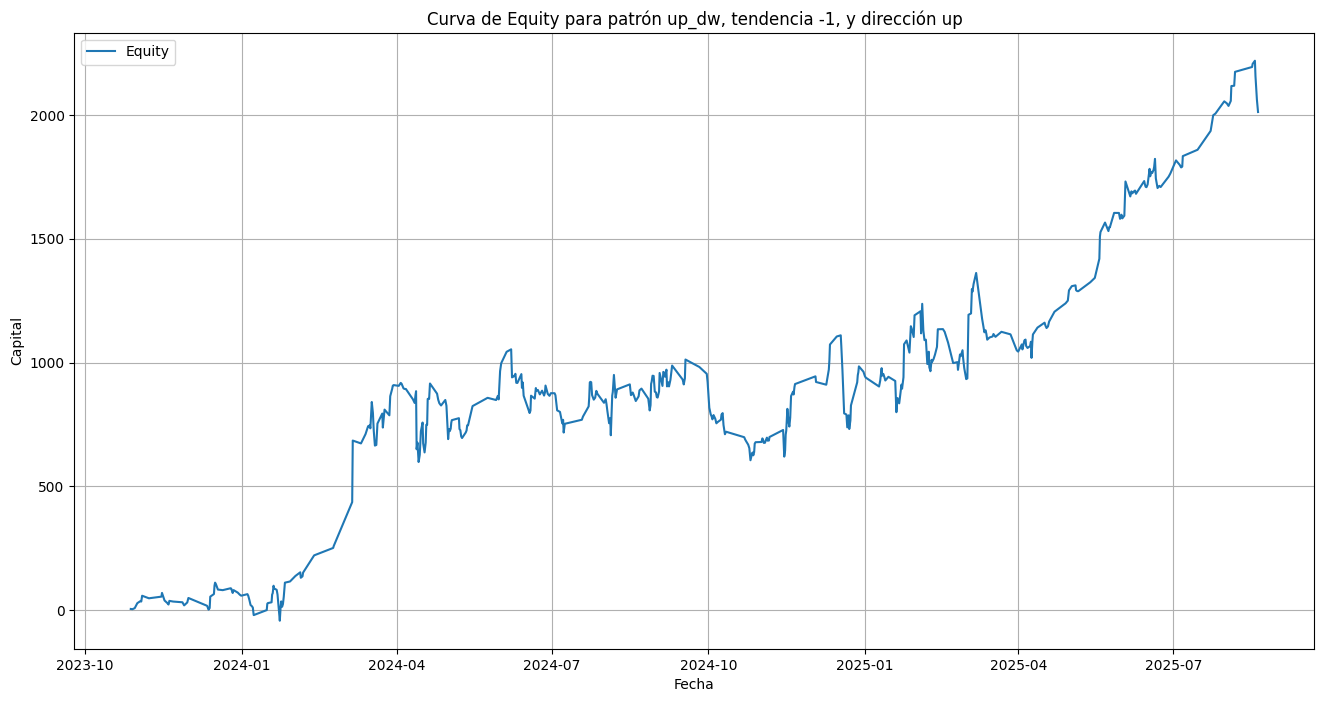

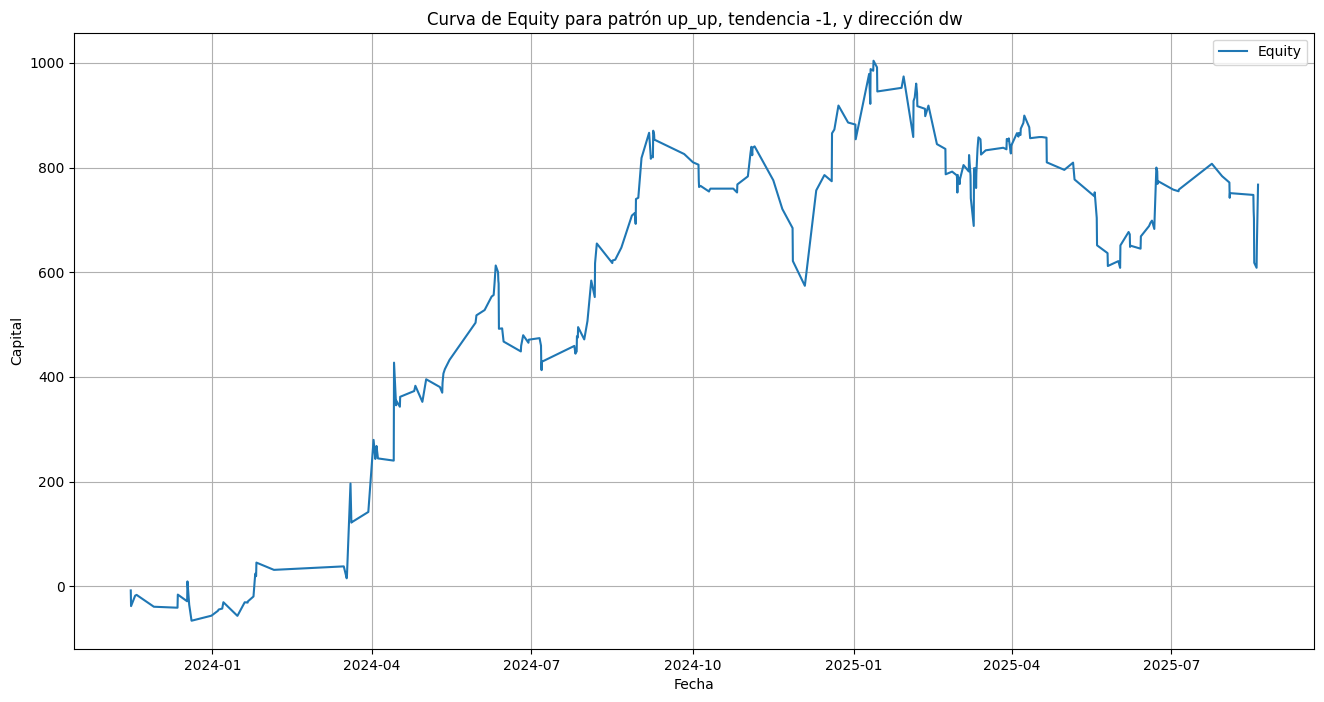

In [ ]:
%run functions_continuous.ipynb

for i in np.arange(len(patterns)):
    pattern_with_expansion = patterns[i]

    df_equity = run_simulation(df,
                            pattern_with_expansion)

    plot_conditional_equity(df_equity, pattern_with_expansion)
